In [1]:
library(monocle3)
library(dplyr)
library(ggplot2)
library(ClusterGVis)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading


Attaching package: ‘monocle3’


The following objects are masked from ‘package:Biobase’:

    exprs, fData, fData<-, pData, pData<-



Attaching package: ‘dplyr’


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following object is masked from ‘package:matrixStats’:

    count


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading require

In [2]:
expression_matrix <- readRDS(url("https://depts.washington.edu:/trapnell-lab/software/monocle3/celegans/data/packer_embryo_expression.rds"))
cell_metadata <- readRDS(url("https://depts.washington.edu:/trapnell-lab/software/monocle3/celegans/data/packer_embryo_colData.rds"))
gene_annotation <- readRDS(url("https://depts.washington.edu:/trapnell-lab/software/monocle3/celegans/data/packer_embryo_rowData.rds"))

cds <- new_cell_data_set(expression_matrix,
                         cell_metadata = cell_metadata,
                         gene_metadata = gene_annotation)

In [3]:
cds

class: cell_data_set 
dim: 20222 6188 
metadata(1): cds_version
assays(1): counts
rownames(20222): WBGene00010957 WBGene00010958 ... WBGene00021594
  WBGene00007064
rowData names(3): id gene_short_name num_cells_expressed
colnames(6188): AAACCTGCAAGACGTG-300.1.1 AAACCTGGTGTGAATA-300.1.1 ...
  TGCGGGTAGTACTTGC-b02 TTTGTCAAGTACACCT-b02
colData names(19): cell n.umi ... bg.b01.loading bg.b02.loading
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [4]:
cds <- preprocess_cds(cds, num_dim = 50)
cds <- align_cds(
    cds, 
    alignment_group = "batch", 
    residual_model_formula_str = "~ bg.300.loading + bg.400.loading + bg.500.1.loading + bg.500.2.loading + bg.r17.loading + bg.b01.loading + bg.b02.loading")

Aligning cells from different batches using Batchelor.
Please remember to cite:
	 Haghverdi L, Lun ATL, Morgan MD, Marioni JC (2018). 'Batch effects in single-cell RNA-sequencing data are corrected by matching mutual nearest neighbors.' Nat. Biotechnol., 36(5), 421-427. doi: 10.1038/nbt.4091

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Inste

No preprocess_method specified, and aligned coordinates have been computed previously. Using preprocess_method = 'Aligned'



No trajectory to plot. Has learn_graph() been called yet?

Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”


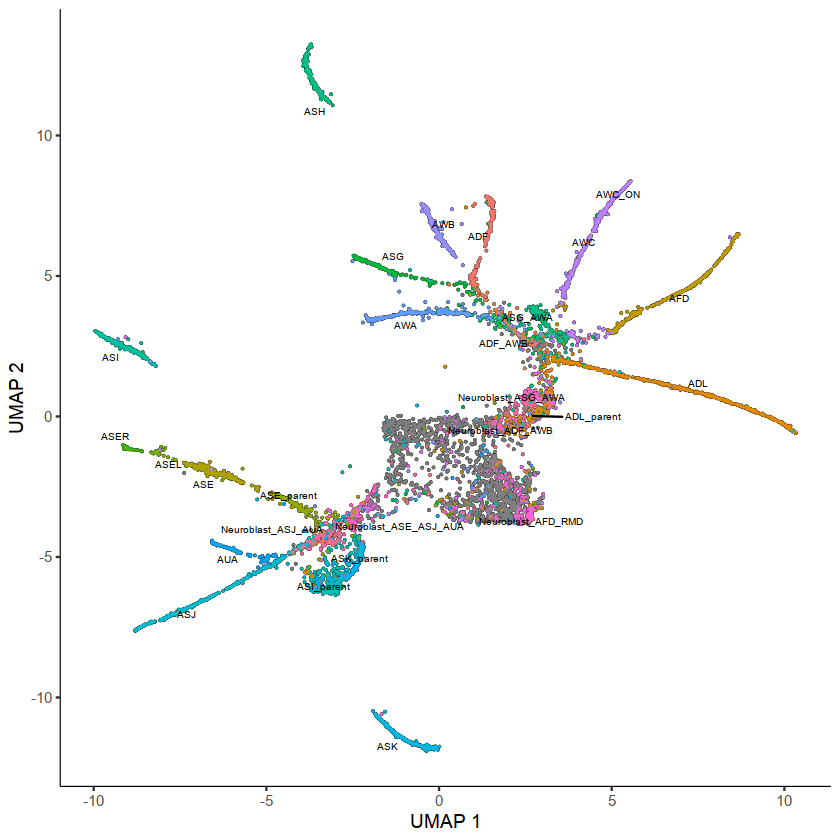

In [5]:
cds <- reduce_dimension(cds)
plot_cells(cds, label_groups_by_cluster=FALSE,  color_cells_by = "cell.type")

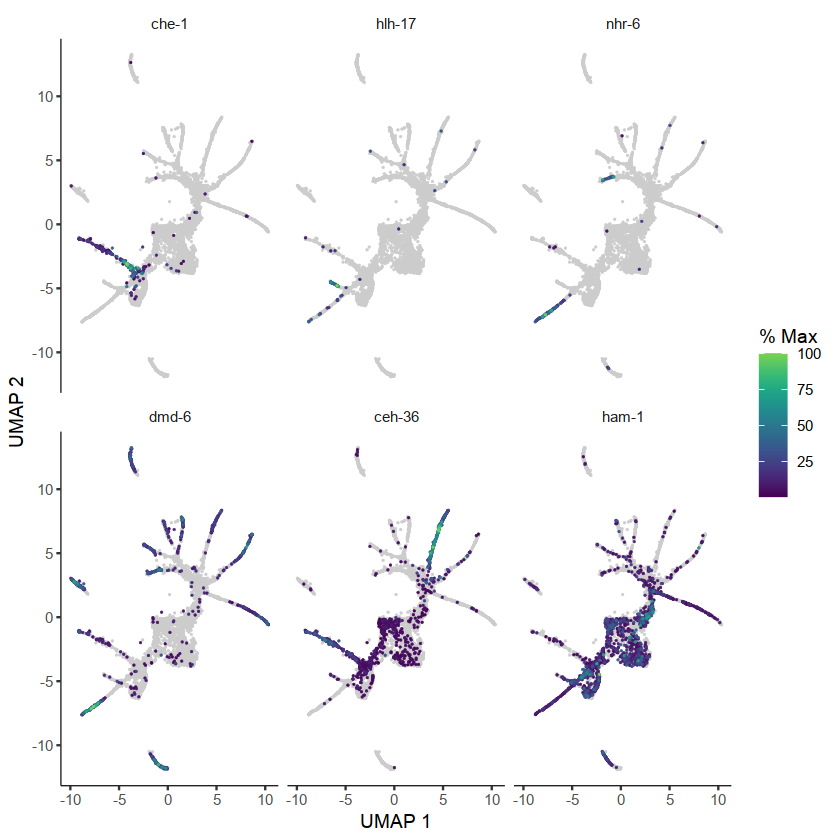

In [6]:
ciliated_genes <- c("che-1",
                    "hlh-17",
                    "nhr-6",
                    "dmd-6",
                    "ceh-36",
                    "ham-1")

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=FALSE,
           show_trajectory_graph=FALSE)

No trajectory to plot. Has learn_graph() been called yet?



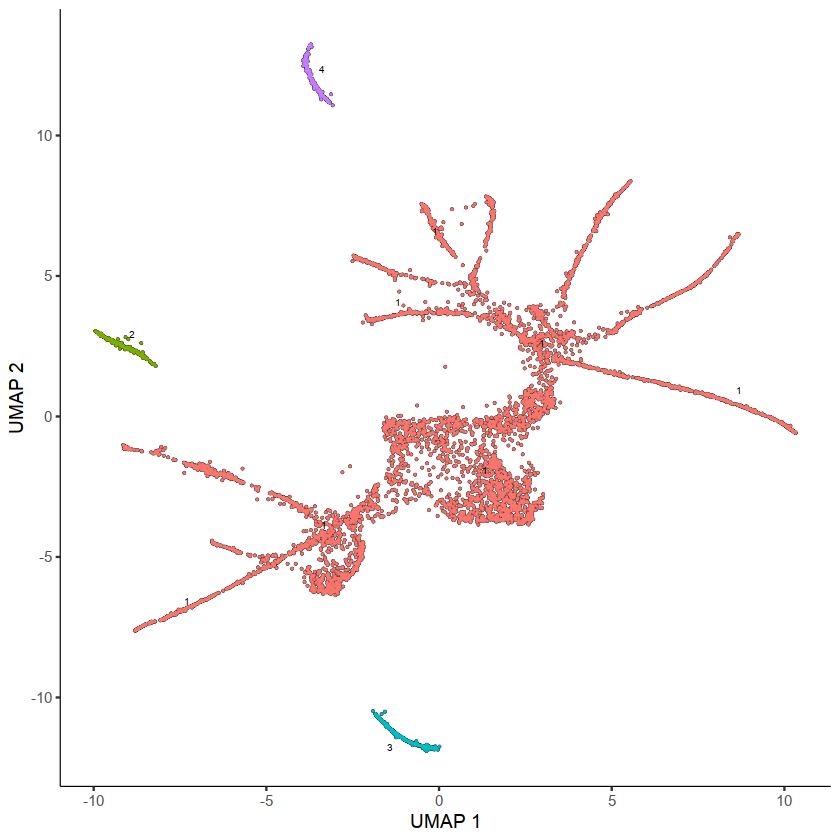

In [7]:
cds <- cluster_cells(cds)
plot_cells(cds, color_cells_by = "partition")

  |======================================================================| 100%


Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”


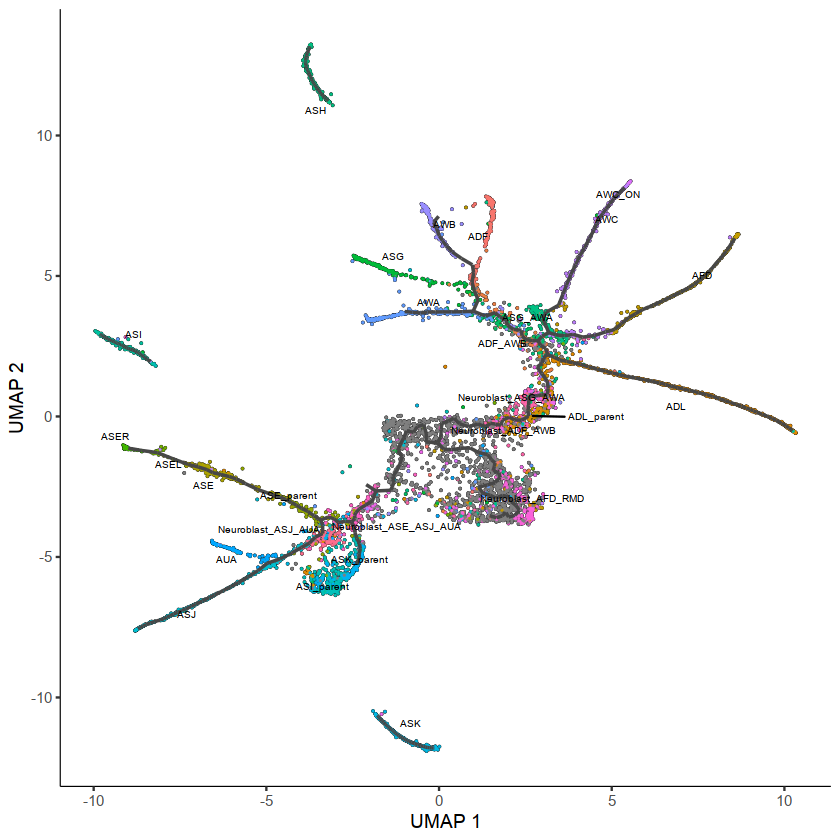

In [8]:
cds <- learn_graph(cds)
plot_cells(cds,
           color_cells_by = "cell.type",
           label_groups_by_cluster=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE)

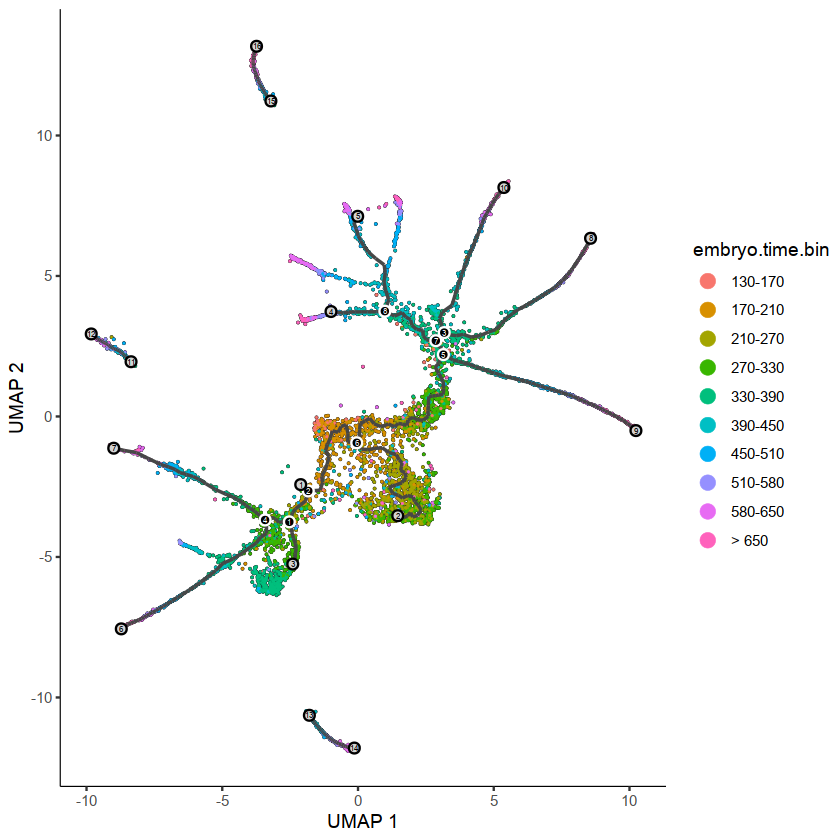

In [9]:
plot_cells(cds,
           color_cells_by = "embryo.time.bin",
           label_cell_groups=FALSE,
           label_leaves=TRUE,
           label_branch_points=TRUE,
           graph_label_size=1.5)


In [10]:
# a helper function to identify the root principal points:
get_earliest_principal_node <- function(cds, time_bin="130-170"){
  cell_ids <- which(colData(cds)[, "embryo.time.bin"] == time_bin)
  
  closest_vertex <-
  cds@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(cds), ])
  root_pr_nodes <-
  igraph::V(principal_graph(cds)[["UMAP"]])$name[as.numeric(names
  (which.max(table(closest_vertex[cell_ids,]))))]
  
  root_pr_nodes
}

筛选细胞：这个函数首先根据time_bin参数，筛选出cds中属于某个时间段的细胞的编号，存储在cell_ids变量中。

找到最近的节点：这个函数然后从cds的principal_graph_aux属性中提取UMAP方法生成的主图的信息，包括每个细胞最近的主图节点的编号，存储在closest_vertex矩阵中。

统计节点频数：这个函数接着根据closest_vertex矩阵，统计出每个主图节点上有多少个属于cell_ids的细胞，即每个节点上有多少个来自某个时间段的细胞。

返回最早的节点：这个函数最后根据统计结果，找出频数最高的节点的名称，即最多细胞来自某个时间段的节点，作为最早的主图节点，返回给调用者。

In [11]:
get_earliest_principal_node(cds)

[1] "Y_240"

In [12]:
cds <- order_cells(cds, root_pr_nodes=get_earliest_principal_node(cds))
# cds <- order_cells(cds, reduction_method = "UMAP", root_cells = colnames(cds[, clusters(cds) == 5]))

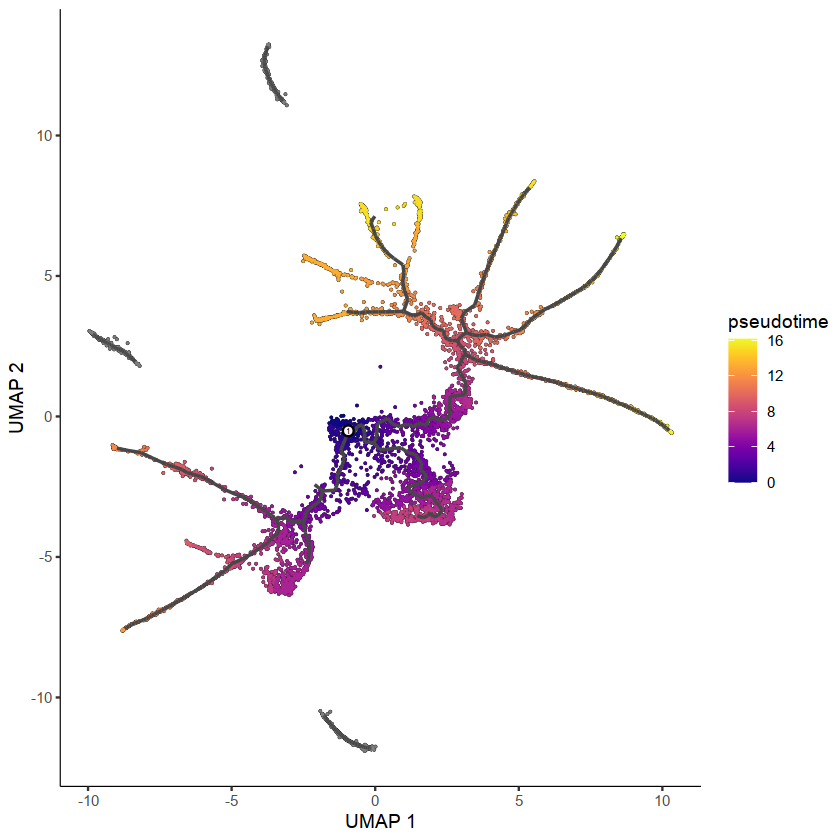

In [13]:
plot_cells(cds,
           color_cells_by = "pseudotime",
           label_cell_groups=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE,
           graph_label_size=1.5)

In [2]:
expression_matrix <- readRDS(url("https://depts.washington.edu:/trapnell-lab/software/monocle3/celegans/data/packer_embryo_expression.rds"))
cell_metadata <- readRDS(url("https://depts.washington.edu:/trapnell-lab/software/monocle3/celegans/data/packer_embryo_colData.rds"))
gene_annotation <- readRDS(url("https://depts.washington.edu:/trapnell-lab/software/monocle3/celegans/data/packer_embryo_rowData.rds"))
cds <- new_cell_data_set(expression_matrix,
                         cell_metadata = cell_metadata,
                         gene_metadata = gene_annotation)
cds <- preprocess_cds(cds, num_dim = 50)
cds <- align_cds(cds, alignment_group = "batch", residual_model_formula_str = "~ bg.300.loading + bg.400.loading + bg.500.1.loading + bg.500.2.loading + bg.r17.loading + bg.b01.loading + bg.b02.loading")
cds <- reduce_dimension(cds)
cds <- cluster_cells(cds)
cds <- learn_graph(cds)


Aligning cells from different batches using Batchelor.
Please remember to cite:
	 Haghverdi L, Lun ATL, Morgan MD, Marioni JC (2018). 'Batch effects in single-cell RNA-sequencing data are corrected by matching mutual nearest neighbors.' Nat. Biotechnol., 36(5), 421-427. doi: 10.1038/nbt.4091

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Inste

  |======================================================================| 100%


In [27]:
# a helper function to identify the root principal points:
get_earliest_principal_node <- function(cds, time_bin="130-170"){
  cell_ids <- which(colData(cds)[, "embryo.time.bin"] == time_bin)
  
  closest_vertex <-
  cds@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(cds), ])
  root_pr_nodes <-
  igraph::V(principal_graph(cds)[["UMAP"]])$name[as.numeric(names
  (which.max(table(closest_vertex[cell_ids,]))))]
  
  root_pr_nodes
}

In [28]:
get_earliest_principal_node(cds)

[1] "Y_240"

Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”


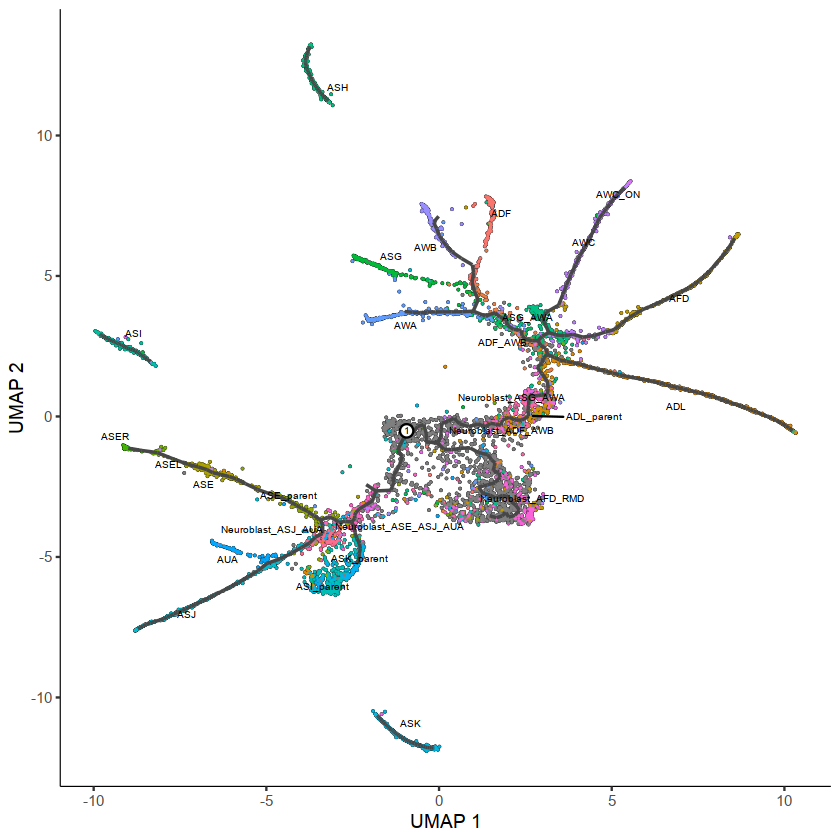

In [29]:
cds <- order_cells(cds, root_pr_nodes='Y_240')
plot_cells(cds,
           color_cells_by = "cell.type",
           label_groups_by_cluster=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE)

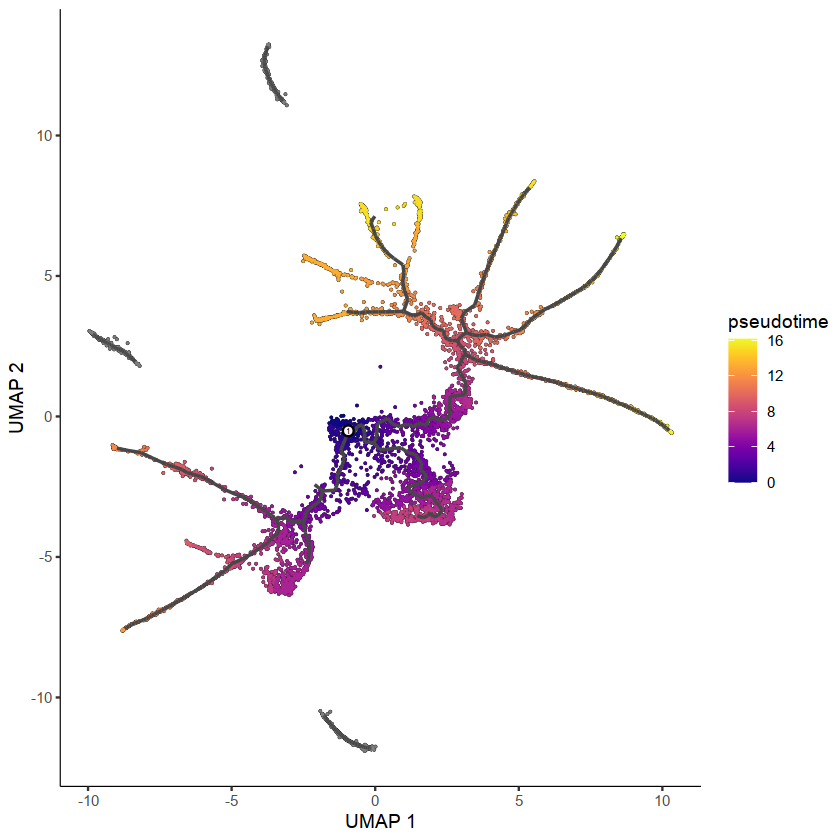

In [30]:
plot_cells(cds,
           color_cells_by = "pseudotime",
           label_cell_groups=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE,
           graph_label_size=1.5)

In [ ]:
ciliated_cds_pr_test_res <- graph_test(cds, neighbor_graph="principal_graph", cores=8)
pr_deg_ids <- row.names(subset(ciliated_cds_pr_test_res, q_value == 0 & morans_I > 0.25))

In [5]:
pr_deg_ids <- row.names(subset(ciliated_cds_pr_test_res, q_value == 0 & morans_I > 0.25))

In [6]:
mat <- pre_pseudotime_matrix(
    cds_obj = cds,
    gene_list = pr_deg_ids)

In [7]:
mat[1:5,1:5]

,1,2,3,4,5
WBGene00021396,1.3011081,1.3013316,1.3015551,1.3017786,1.3020021
WBGene00021395,-0.5953027,-0.5952114,-0.5951201,-0.5950289,-0.5949376
WBGene00002140,-1.5598601,-1.5592452,-1.5586304,-1.5580155,-1.5574007
WBGene00022295,-0.9491091,-0.9489283,-0.9487475,-0.9485667,-0.9483859
WBGene00016025,1.0619806,1.0613020,1.0606235,1.0599449,1.0592663


In [8]:
dim(mat)

[1]  680 6188

0 genes excluded.


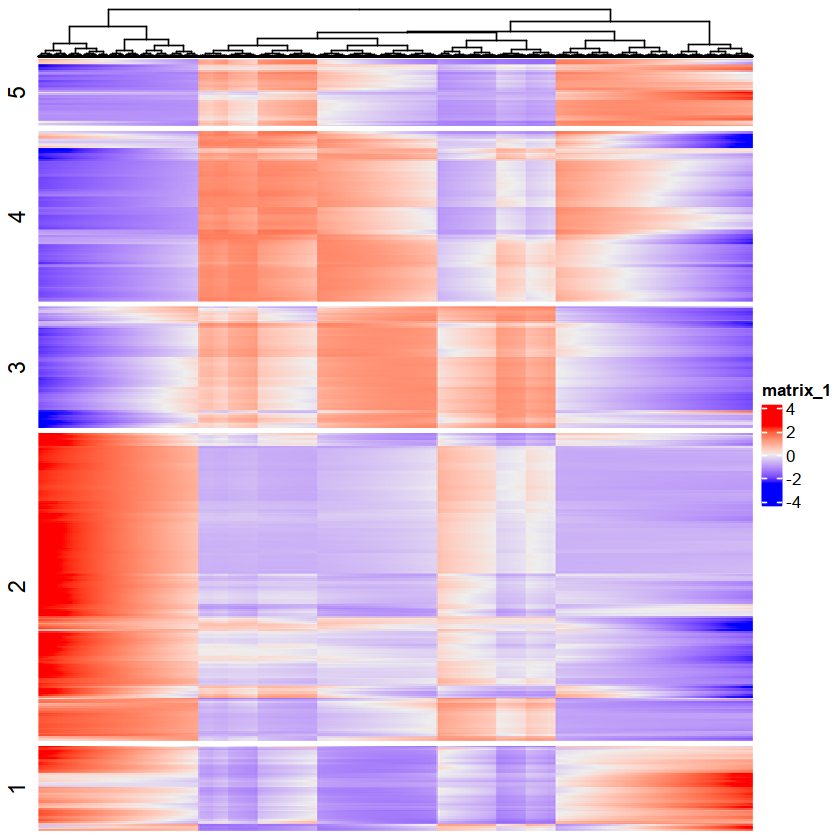

In [9]:
ck <- clusterData(
    exp = mat,
    cluster.method = "kmeans",
    cluster.num = 5)

This palatte have 20 colors!



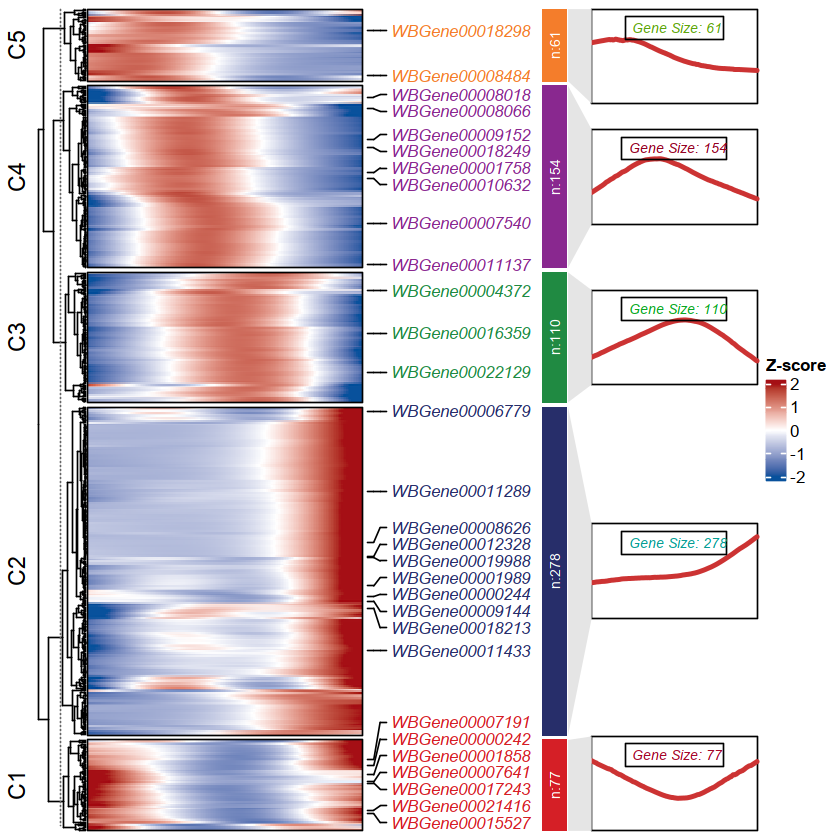

In [10]:
visCluster(object = ck,
           plot.type = "both",
           add.sampleanno = F,
           markGenes = sample(rownames(mat),30,replace = F))

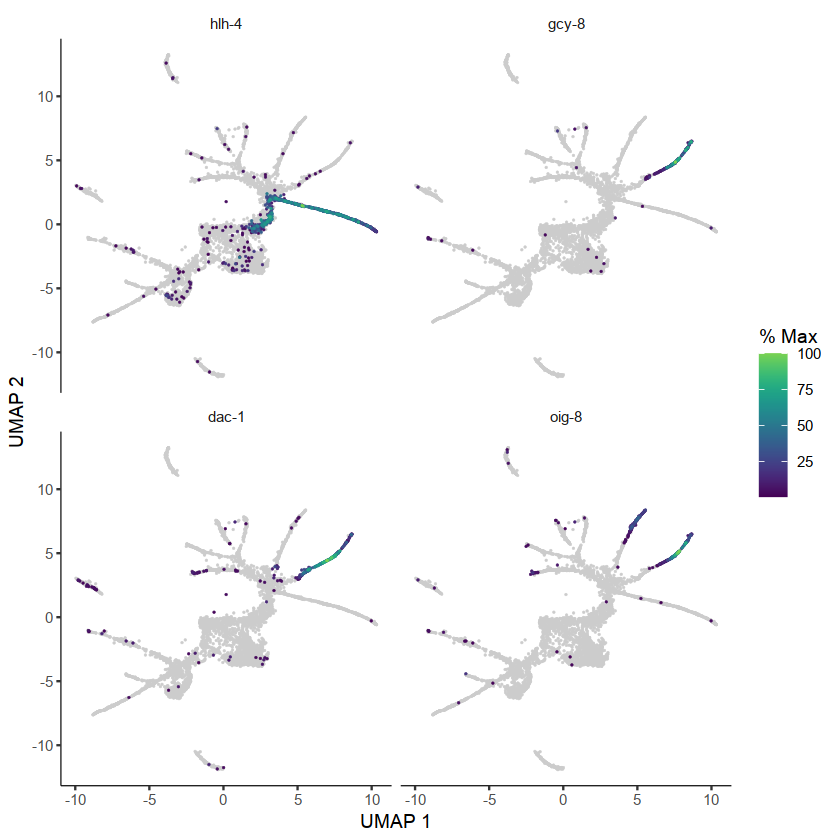

In [11]:
plot_cells(cds, genes=c("hlh-4", "gcy-8", "dac-1", "oig-8"),
           show_trajectory_graph=FALSE,
           label_cell_groups=FALSE,
           label_leaves=FALSE)

In [12]:
gene_module_df <- find_gene_modules(cds[pr_deg_ids,], resolution=c(10^seq(-6,-1)))

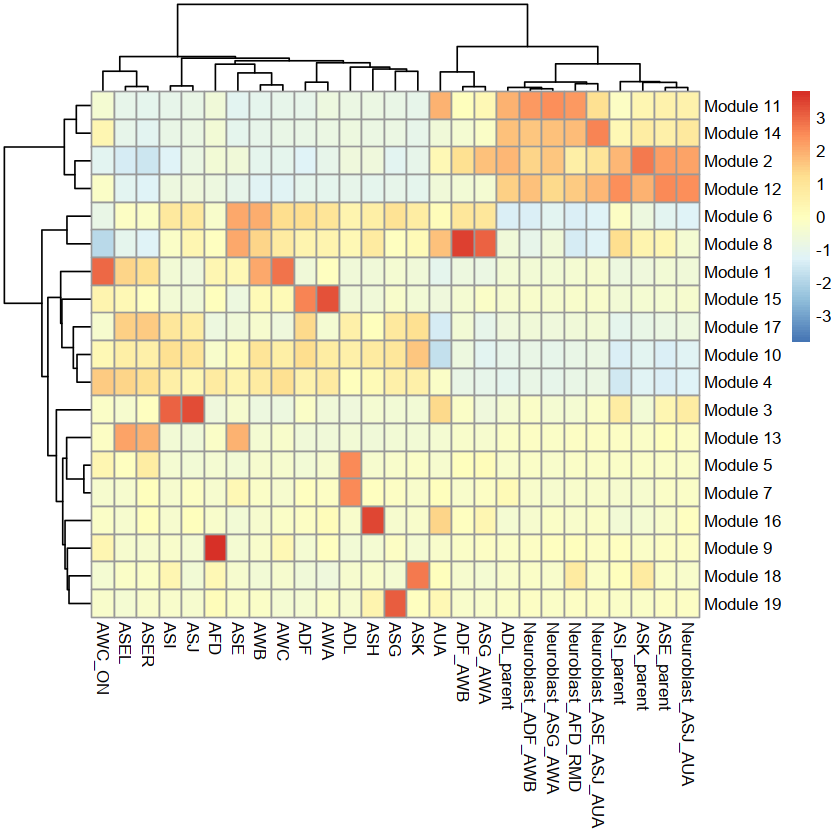

In [13]:
cell_group_df <- tibble::tibble(cell=row.names(colData(cds)), 
                                cell_group=colData(cds)$cell.type)
agg_mat <- aggregate_gene_expression(cds, gene_module_df, cell_group_df)
row.names(agg_mat) <- stringr::str_c("Module ", row.names(agg_mat))
pheatmap::pheatmap(agg_mat,
                   scale="column", clustering_method="ward.D2")

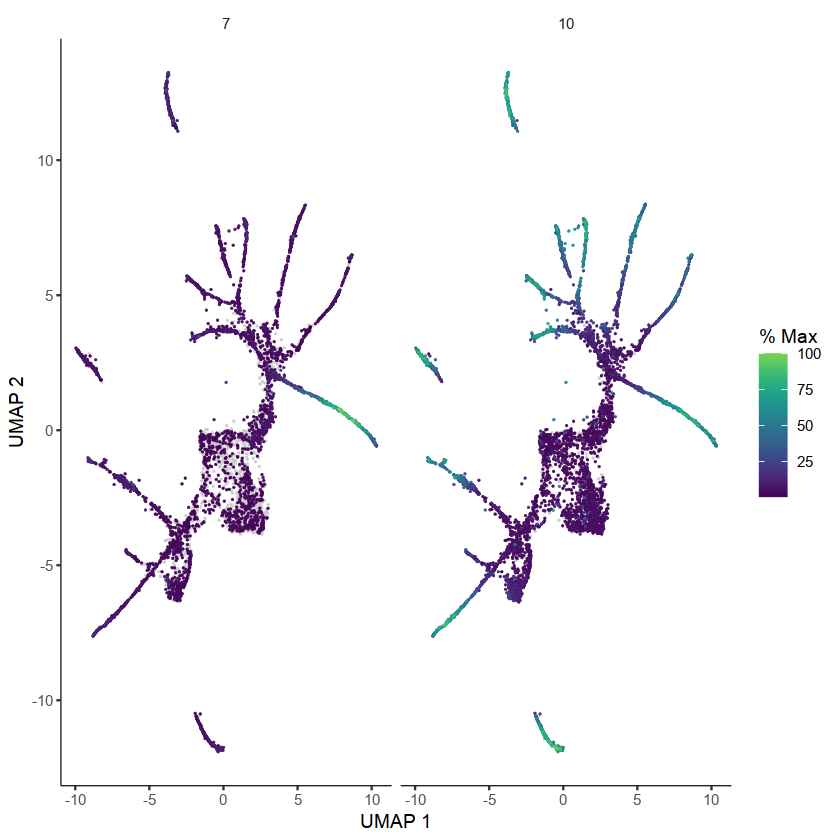

In [14]:
plot_cells(cds,
           genes=gene_module_df %>% filter(module %in% c(27, 10, 7, 30)),
           label_cell_groups=FALSE,
           show_trajectory_graph=FALSE)

In [31]:
AFD_genes <- c("gcy-8", "dac-1", "oig-8")
AFD_lineage_cds <- cds[rowData(cds)$gene_short_name %in% AFD_genes,
                       colData(cds)$cell.type %in% c("AFD")]
AFD_lineage_cds <- order_cells(AFD_lineage_cds, root_pr_nodes='Y_62')

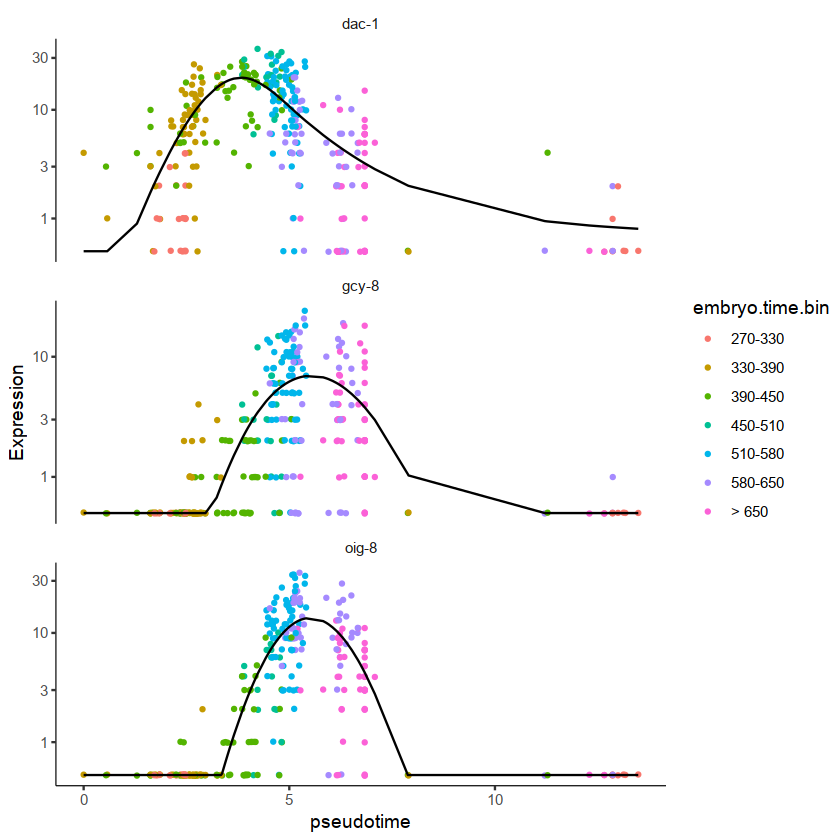

In [32]:
monocle3::plot_genes_in_pseudotime(AFD_lineage_cds,
                         color_cells_by="embryo.time.bin",
                         min_expr=0.5)